## MNIST 3 examples

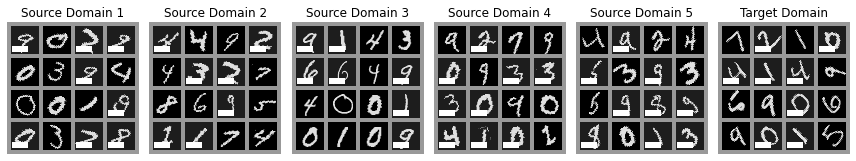

In [1]:
import numpy as np
import torchvision
import torch
import matplotlib.pyplot as plt
import sys

sys.path.append("..")
import src.method
import src.mdata

torch.manual_seed(1)

trainloaders = src.mdata.mnist.mnist_perturb_preset(perturb='rotation_3', M=6,
                                                       datapath='../data')

# get some random training images
fig, ax = plt.subplots(figsize=(12, 2.25), nrows=1, ncols=6)
for i, m in enumerate([4,3,2,1,0,5]):
    dataiter = iter(trainloaders[m])
    images, labels = dataiter.next()
    
    # show images
    img = torchvision.utils.make_grid(images[:16].reshape(-1, 1, 28, 28), nrow = 4, padding=4, normalize=True, pad_value=0.6)
    ax[i].imshow(np.transpose(img.numpy(), (1,2,0)))
    ax[i].axis('off')
    if i<5:
        ax[i].set_title(f'Source Domain {i+1}')
    else:
        ax[i].set_title(f'Target Domain')

plt.tight_layout()
#plt.savefig('../results/mnist.jpeg', dpi=200)
plt.show()

## MNIST 3, CIP and DIP disagree

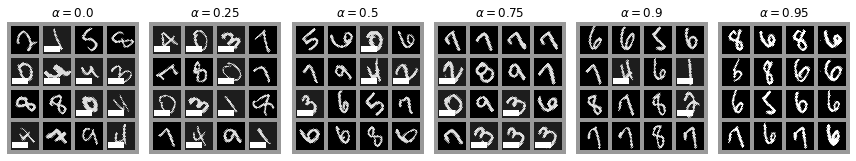

In [6]:

props = [1., 0.75, 0.5, 0.25, 0.1, 0.05]
fig, ax = plt.subplots(figsize=(12, 2.25), nrows=1, ncols=len(props))

for i, proportion in enumerate(props):
    #dat = np.load(f"../result2/DIPfail_MNIST_03_seed_0_lamDIP_10.0_prop_{proportion}_diff_img.npy.npz", allow_pickle=True)
    dat = np.load(f"../results/DIPfail_MNIST_3_seed_1_lamDIP_10.0_prop_{proportion}_diff_img.npz", allow_pickle=True)
    img = dat['diff_img']
    img = torchvision.utils.make_grid(torch.tensor(img[-16:].reshape(-1, 1, 28, 28)),
                                      nrow = 4, padding=4, normalize=True, pad_value=0.6)
    ax[i].imshow(np.transpose(img.numpy(), (1,2,0)))
    ax[i].axis('off')
    ax[i].set_title(f'$\\alpha={1-proportion}$')
plt.tight_layout()
#plt.savefig('../results/mnist2.jpeg', dpi=200)
plt.show()

